In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

In [2]:
start_time = datetime.strptime('00:00:00', '%H:%M:%S')
end_time = datetime.strptime('06:59:00', '%H:%M:%S')
delta = timedelta(minutes=1)

time_list = []

while start_time <= end_time:
    time_list.append(start_time.strftime('%H:%M:%S'))
    start_time += delta

In [3]:
len(time_list)

420

In [4]:
memory1 = np.random.uniform(0.5, 4, size=421)
memory2 = np.random.uniform(0.5, 4, size=421)
memory3 = np.random.uniform(0.5, 4, size=421)
memory4 = np.random.uniform(0.5, 4, size=421)
memory5 = np.random.uniform(0.5, 4, size=421)
memory6 = np.random.uniform(0.5, 4, size=421)
memory7 = np.random.uniform(0.5, 4, size=421)

In [5]:
print(memory1.mean())
print(memory2.mean())
print(memory3.mean())
print(memory4.mean())
print(memory5.mean())
print(memory6.mean())
print(memory7.mean())

print(memory1.max())
print(memory2.max())
print(memory3.max())
print(memory4.max())
print(memory5.max())
print(memory6.max())
print(memory7.max())

2.267720701998448
2.2353651765248097
2.2891390496842314
2.221200659312747
2.2762564154930853
2.1895738864132452
2.1783979815418286
3.9835759269978612
3.996622159467518
3.9751104098640413
3.981276471998242
3.9857147025820225
3.982022054255782
3.9977026047667614


In [6]:
data1 = {'Time': [], 'Memory': []}

for i, j in zip(time_list, memory1):
    data1['Time'].extend([i])
    data1['Memory'].extend([j])

data2 = {'Time': [], 'Memory': []}

for i, j in zip(time_list, memory2):
    data2['Time'].extend([i])
    data2['Memory'].extend([j])

data3 = {'Time': [], 'Memory': []}

for i, j in zip(time_list, memory3):
    data3['Time'].extend([i])
    data3['Memory'].extend([j])

data4 = {'Time': [], 'Memory': []}

for i, j in zip(time_list, memory4):
    data4['Time'].extend([i])
    data4['Memory'].extend([j])

data5 = {'Time': [], 'Memory': []}

for i, j in zip(time_list, memory5):
    data5['Time'].extend([i])
    data5['Memory'].extend([j])

data6 = {'Time': [], 'Memory': []}

for i, j in zip(time_list, memory6):
    data6['Time'].extend([i])
    data6['Memory'].extend([j])

data7 = {'Time': [], 'Memory': []}

for i, j in zip(time_list, memory7):
    data7['Time'].extend([i])
    data7['Memory'].extend([j])

In [7]:
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
df3 = pd.DataFrame(data3)
df4 = pd.DataFrame(data4)
df5 = pd.DataFrame(data5)
df6 = pd.DataFrame(data6)
df7 = pd.DataFrame(data7)

In [8]:
df1.insert(0, 'Date', '2024-02-01')
df2.insert(0, 'Date', '2024-02-02')
df3.insert(0, 'Date', '2024-02-03')
df4.insert(0, 'Date', '2024-02-04')
df5.insert(0, 'Date', '2024-02-05')
df6.insert(0, 'Date', '2024-02-06')
df7.insert(0, 'Date', '2024-02-07')

In [9]:
df = pd.concat([df1, df2, df3, df4, df5, df6, df7], ignore_index=True)

In [10]:
df.shape

(2940, 3)

In [11]:
df.head(10)

,Date,Time,Memory
0,2024-02-01,00:00:00,2.687879
1,2024-02-01,00:01:00,2.739426
2,2024-02-01,00:02:00,1.178804
3,2024-02-01,00:03:00,3.108920
4,2024-02-01,00:04:00,3.370266
5,2024-02-01,00:05:00,3.024072
6,2024-02-01,00:06:00,1.881904
7,2024-02-01,00:07:00,0.544900
8,2024-02-01,00:08:00,3.362272
9,2024-02-01,00:09:00,3.028946


In [12]:
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df['Hour'] = df['Datetime'].dt.hour
df.head()

,Date,Time,Memory,Datetime,Hour
0,2024-02-01,00:00:00,2.687879,2024-02-01 00:00:00,0
1,2024-02-01,00:01:00,2.739426,2024-02-01 00:01:00,0
2,2024-02-01,00:02:00,1.178804,2024-02-01 00:02:00,0
3,2024-02-01,00:03:00,3.108920,2024-02-01 00:03:00,0
4,2024-02-01,00:04:00,3.370266,2024-02-01 00:04:00,0


In [13]:
df['Hour'].unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [14]:
result = df.groupby(['Date', 'Hour']).agg({'Memory': ['mean', 'max']}).reset_index()
result.columns = ['Date', 'Hour', 'Average_Memory', 'Max_Memory']

In [15]:
result.shape

(49, 4)

In [16]:
result.head(10)

,Date,Hour,Average_Memory,Max_Memory
0,2024-02-01,0,2.399374,3.938668
1,2024-02-01,1,2.135504,3.974426
2,2024-02-01,2,2.199010,3.850812
3,2024-02-01,3,2.348617,3.983576
4,2024-02-01,4,2.216049,3.877517
5,2024-02-01,5,2.320474,3.961899
6,2024-02-01,6,2.264207,3.887858
7,2024-02-02,0,2.195507,3.947320
8,2024-02-02,1,2.161968,3.971121
9,2024-02-02,2,2.207646,3.917146


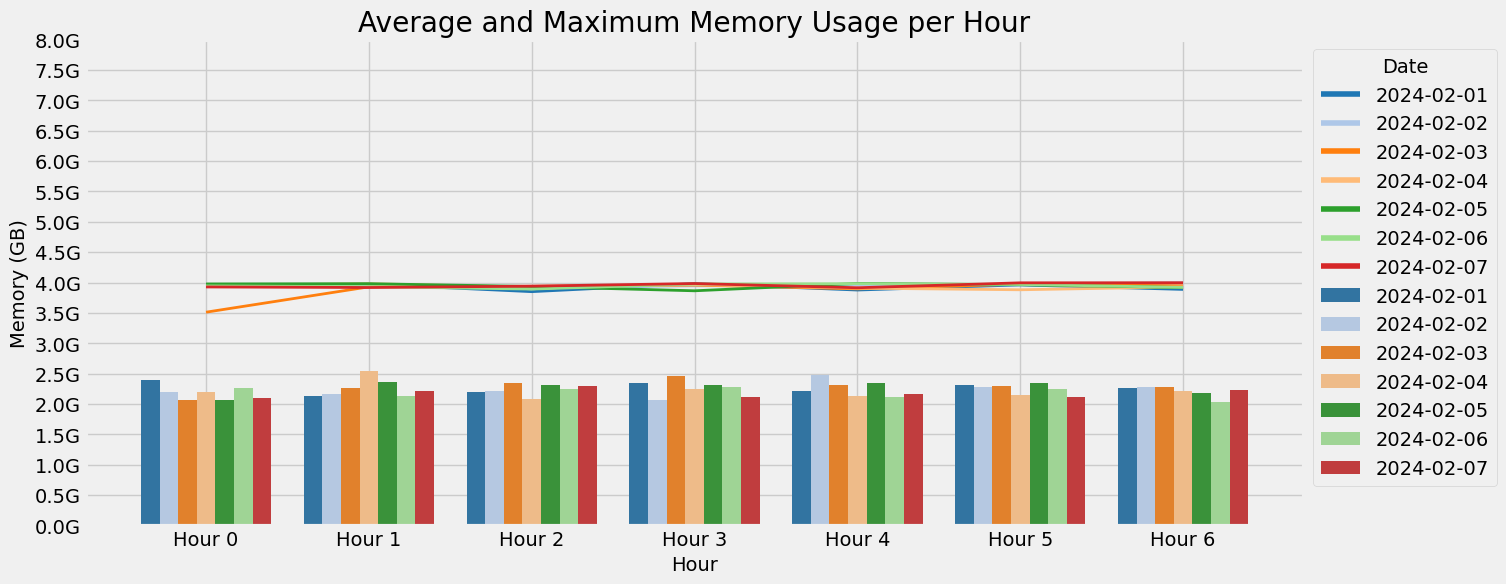

In [17]:
from matplotlib.ticker import EngFormatter, StrMethodFormatter
plt.style.use('fivethirtyeight')
sns.set_palette('tab20')
fig, ax = plt.subplots(1, 1, figsize=(14, 6))
sns.barplot(ax=ax, data=result, x='Hour', y='Average_Memory', hue='Date', dodge=True)
sns.lineplot(ax=ax, data=result, x='Hour', y='Max_Memory', hue='Date', marker='', linestyle='-', markersize=0, lw=2)
plt.xlabel('Hour')
plt.ylabel('Memory (GB)')
plt.title('Average and Maximum Memory Usage per Hour')
ax.xaxis.set_major_formatter(StrMethodFormatter('Hour {x:.0f}'))
#plt.xticks(fontname = 'Yu Gothic')
ax.yaxis.set_major_formatter(StrMethodFormatter(u'{x:.1f}G'))
ax.legend(title='Date', loc='upper left', bbox_to_anchor=(1, 1))
ax.set_yticks(np.arange(0, 8.1, step=.5))
#plt.tight_layout()  # Adjust layout to prevent overlapping
plt.grid(True)
plt.show()